In [1]:
from half_edge import *

In [2]:
from pytket.circuit.display import render_circuit_jupyter

Vertex ordering by degree (descending), ties randomized:
[0, 1, 3, 2]
Vertex to main qubit mapping: {0: 1}

Extracted circuit:
  Total qubits: 3
  Total gates: 4
  Final mapping: {1: 1, 3: 2, 2: 0}
[] [0] [1, 2, 3]


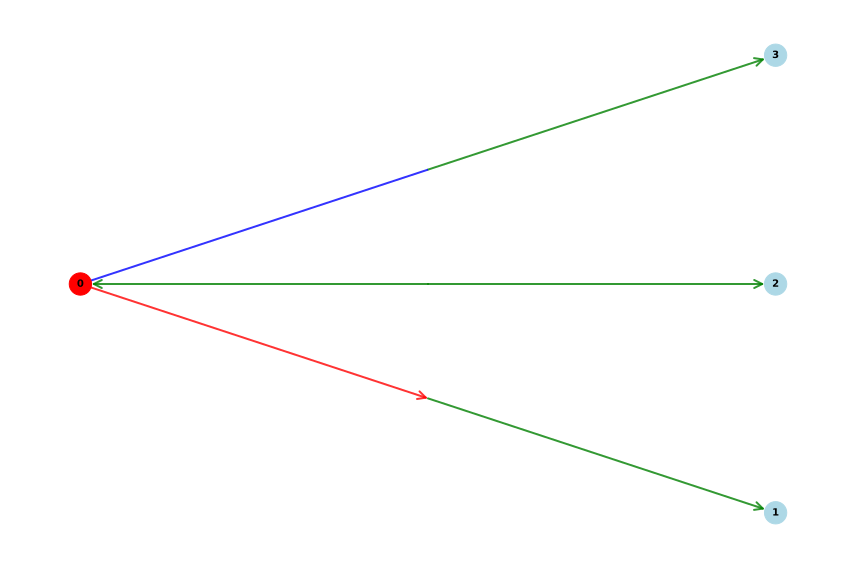

In [45]:
"""Example usage of the split_directed_edges function on a ZX-diagram."""
zx_graph = generate_zx_graph(3, None)
# zx_graph = generate_zx_graph(6, None)
if zx_graph is None:
    raise RuntimeError("Failed to generate ZX graph")

G, pos, node_types = zx_diagram_to_networkx_graph(zx_graph)

# Random degree-based ordering of the original vertices
ordering = print_random_degree_ordering(G, seed=42)

# Get colored DiGraph for circuit extraction
colored_G = assign_half_edge_coloring(G, seed=42)

# Extract circuit from the colored graph (before splitting)
builder, final_mapping = extract_circuit(colored_G, ordering)
print(f"\nExtracted circuit:")
print(f"  Total qubits: {len(builder.qubit_alive)}")
print(f"  Total gates: {len(builder.gates)}")
print(f"  Final mapping: {final_mapping}")

# Split edges for visualization
new_G, new_pos = split_directed_edges(G, pos, color_seed=42)
visualize_split_graph(new_G, new_pos)

In [24]:
import pyzx as zx
c = builder.to_pyzx()
# zx.draw(c)
g = c.to_graph()

zx.id_simp(g)
zx.draw(g)
degree1_simp(g)

# zx.full_reduce(g)
compress_rows(g)
zx.draw(g)
# zx.full_reduce(g)
zx.id_simp(g)
degree1_simp(g)
zx.draw(g)
zx.full_reduce(g)
zx.draw(g)